In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    'font.size': 15, 'lines.linewidth': 2,
    'xtick.labelsize': 13, 'ytick.labelsize': 13,
    'axes.spines.top': False, 'axes.spines.right': False,
    'figure.dpi': 72, 'savefig.dpi': 1200,
})

import pickle
import numpy as np

rng = np.random.default_rng()

A sample beta distribution discretized into 10 bins


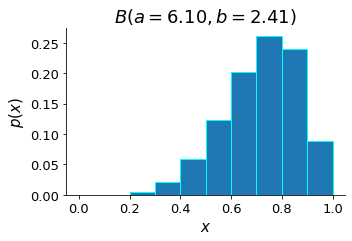

In [2]:
from scipy.stats import beta

num_bins = 10
xs = (np.arange(num_bins)+0.5)/num_bins

a, b = rng.uniform(low=2, high=10, size=2)
ps = beta.pdf(xs, a, b)
ps /= ps.sum()

print(f"A sample beta distribution discretized into {num_bins} bins")
_, ax = plt.subplots(figsize=(5, 3))
ax.bar(xs, ps, width=1/num_bins, edgecolor='cyan')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$p(x)$')
ax.set_title(r'$B(a={:.2f}, b={:.2f})$'.format(a, b))
plt.show()

In [3]:
num_samples = 50000

params, ps = [], []
for _ in range(num_samples):
    a, b = rng.uniform(low=2, high=10, size=2)
    params.append((a, b))
    _ps = beta.pdf(xs, a, b)
    _ps /= _ps.sum()
    ps.append(_ps)
params = np.array(params)
ps = np.stack(ps)

save_path = 'dataset_beta.pickle'
with open(save_path, 'wb') as f:
    pickle.dump({
        'xs': xs, 'params': params, 'ps': ps,
    }, f)
print(f"{num_samples} sample beta distributions generated and saved in {save_path}")

50000 sample beta distributions generated and saved in dataset_beta.pickle
